In [ ]:
# https://drive.google.com/file/d/17Drdl3Rb_mKsRUVCt9WShEOucKx8WhxT/view?usp=sharing
system("gdown --id 17Drdl3Rb_mKsRUVCt9WShEOucKx8WhxT")

In [ ]:
list.files()

[1] "bank-additional-full.csv" "sample_data"

In [ ]:
library('tidyverse')
library('magrittr')



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [ ]:
if (!require('caret')) install.packages('caret')
library('caret')

Loading required package: caret

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caret’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [ ]:
if (!require('gam')) install.packages('gam')
library('gam')

Loading required package: gam

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘gam’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: splines

Loading required package: foreach


Attaching package: ‘foreach’


The following objects are masked from ‘package:purrr’:

    accumulate, when


Loaded gam 1.20




In [ ]:
if (!require('e1071')) install.packages('e1071')
library('e1071')

Loading required package: e1071

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘e1071’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
if (!require('earth')) install.packages('earth')
library('earth')

Loading required package: earth

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘earth’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plotrix’, ‘Formula’, ‘plotmo’, ‘TeachingDemos’


Loading required package: Formula

Loading required package: plotmo

Loading required package: plotrix

Loading required package: TeachingDemos



In [ ]:
# Leer el archivo csv
data_banco <- read_delim("bank-additional-full.csv", delim= ";")

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  duration = col_double(),
  campaign = col_double(),
  pdays = col_double(),
  previous = col_double(),
  emp.var.rate = col_double(),
  cons.price.idx = col_double(),
  cons.conf.idx = col_double(),
  euribor3m = col_double(),
  nr.employed = col_double()
)

See spec(...) for full column specifications.



In [ ]:
# str(data_publicidad) # Opcion de R-base
glimpse(data_banco)

Rows: 41,188
Columns: 21
$ age            <dbl> 56, 57, 37, 40, 56, 45, 59, 41, 24, 25, 41, 25, 29, 57…
$ job            <chr> "housemaid", "services", "services", "admin.", "servic…
$ marital        <chr> "married", "married", "married", "married", "married",…
$ education      <chr> "basic.4y", "high.school", "high.school", "basic.6y", …
$ default        <chr> "no", "unknown", "no", "no", "no", "unknown", "no", "u…
$ housing        <chr> "no", "no", "yes", "no", "no", "no", "no", "no", "yes"…
$ loan           <chr> "no", "no", "no", "no", "yes", "no", "no", "no", "no",…
$ contact        <chr> "telephone", "telephone", "telephone", "telephone", "t…
$ month          <chr> "may", "may", "may", "may", "may", "may", "may", "may"…
$ day_of_week    <chr> "mon", "mon", "mon", "mon", "mon", "mon", "mon", "mon"…
$ duration       <dbl> 261, 149, 226, 151, 307, 198, 139, 217, 380, 50, 55, 2…
$ campaign       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ pdays          <dbl> 999,

In [ ]:
# %<>% : Pipe que permite calcular todo y guardarlo en la variable de la izquierda.
# Convertir a factor
data_banco %<>% 
  mutate( y = factor(y, 
                     levels= c("yes","no"), 
                     labels= c("si", "no")) ) 
# Verificar
# str : ver la estructura de la variable
data_banco %$% str(y)

# Convertir a factor
data_banco %<>% 
  mutate( education = factor( education, 
                     levels= c("illiterate", "basic.4y", "basic.6y", 
                               "basic.9y", "high.school",  "professional.course",
                               "university.degree", "unknown" ), 
                     labels= c("No_Educ", "4A_Bas", "6A_Bas",
                               "9A_Bas", "Bachill", "Tecnico",
                               "Univer", "Descon")
                     )  ) 

# Convertir a factor
data_banco %<>% 
  mutate( month = factor( month, 
                     levels= c("mar", "apr", "may", "jun", "jul", 
                               "aug", "sep", "oct", "nov", "dec" ), 
                     labels= c("Mar", "Abr", "May", "Jun", "Jul", 
                               "Ago", "Sep", "Oct", "Nov", "Dec" )),
          day_of_week = factor( day_of_week, 
                     levels= c("mon", "tue", "wed", "thu", "fri" ), 
                     labels= c("Lun", "Mar", "Mie", "Jue", "Vie" )),
          ) 

data_banco <- data_banco %>% 
  mutate( job= ifelse(job=='blue-collar', 'blue_collar', 
                  ifelse(job=='admin.', 'admin', 
                 ifelse(job=='self-employed', 'self_employed', 
                        ifelse(job %in% c('housemaid', 'unemployed', 'student', 'unknown'), 'other', job))))
  )


data_banco %<>% 
  mutate(pdays_binaria = ifelse(pdays==999, "No", "Si"))

data_banco <- rename_with(data_banco, ~ tolower(gsub(".", "_", .x, fixed = TRUE)))


 Factor w/ 2 levels "si","no": 2 2 2 2 2 2 2 2 2 2 ...


In [ ]:


## Crear train - test
## createDataPartition funcion de caret, genera índices para muestra aleatoria
set.seed(123)
partition <- createDataPartition(data_banco$y, p= 0.80, 
                                 list = FALSE, times= 1)
## train y test
df_train_ORIG <- data_banco %>% slice(partition)
df_test <- data_banco %>% slice(-partition)



In [ ]:
dim(df_train_ORIG)

[1] 32951    22

In [ ]:
df_train <- upSample( 
  x = df_train_ORIG %>% select(-y), 
  y = df_train_ORIG$y,
  yname= "y")
  
dim(df_train)

[1] 58478    22

In [ ]:
preProc <- c("knnImpute", "center", "scale")


# Hacer un modelo lineal usando cross-validacion
# de 5-fold
# Crear trainControl
myControl <- trainControl(
  summaryFunction = twoClassSummary,  
  classProbs = TRUE, 
  verboseIter = TRUE,
  savePredictions = TRUE, 
  method = "cv", number = 5
)



df_train_mod <- df_train %>% select(-c(duration, pdays)) 


In [ ]:
## GLM

In [ ]:

set.seed(123)
model_glm <- train(
  y ~ ., 
  df_train_mod,
  preProcess = preProc,
  method = "glm",
  family= "binomial",
  trControl = myControl
)

summary(model_glm$finalModel)
model_glm


Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. ROC will be used instead.”


+ Fold1: parameter=none 


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


- Fold1: parameter=none 
+ Fold2: parameter=none 


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


- Fold2: parameter=none 
+ Fold3: parameter=none 


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


- Fold3: parameter=none 
+ Fold4: parameter=none 


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


- Fold4: parameter=none 
+ Fold5: parameter=none 


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


- Fold5: parameter=none 
Aggregating results
Fitting final model on full training set



Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1787  -0.8097  -0.0747   0.8578   2.8687  

Coefficients: (1 not defined because of singularities)
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.145612   0.011090 -13.130  < 2e-16 ***
age                  0.018303   0.014255   1.284 0.199142    
jobblue_collar       0.044081   0.014358   3.070 0.002139 ** 
jobentrepreneur     -0.010042   0.009902  -1.014 0.310535    
jobmanagement       -0.004030   0.010752  -0.375 0.707782    
jobother            -0.002395   0.012160  -0.197 0.843835    
jobretired          -0.071488   0.013919  -5.136 2.81e-07 ***
jobself_employed     0.015123   0.010169   1.487 0.136944    
jobservices          0.015411   0.011211   1.375 0.169236    
jobtechnician        0.039128   0.012703   3.080 0.002068 ** 
maritalmarried       0.016157   0.016018   1.009 0.313130    
maritalsingle       -0.034942   0.017066  -2.048 0.040609 *  
maritalunkno

Generalized Linear Model 

58478 samples
   19 predictor
    2 classes: 'si', 'no' 

Pre-processing: nearest neighbor imputation (49), centered (49), scaled (49) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 46782, 46783, 46782, 46783, 46782 
Resampling results:

  ROC        Sens       Spec     
  0.7964585  0.6328531  0.8510552


In [ ]:
predictions <- predict(model_glm, newdata= df_train_mod)
confusionMatrix(predictions, df_train_mod$y)



Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


Confusion Matrix and Statistics

          Reference
Prediction    si    no
        si 18492  4355
        no 10747 24884
                                          
               Accuracy : 0.7417          
                 95% CI : (0.7382, 0.7453)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4835          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.6324          
            Specificity : 0.8511          
         Pos Pred Value : 0.8094          
         Neg Pred Value : 0.6984          
             Prevalence : 0.5000          
         Detection Rate : 0.3162          
   Detection Prevalence : 0.3907          
      Balanced Accuracy : 0.7417          
                                          
       'Positive' Class : si              
                  

In [ ]:
predictions <- predict(model_glm, newdata= df_test)
confusionMatrix(predictions, df_test$y)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


Confusion Matrix and Statistics

          Reference
Prediction   si   no
        si  595 1144
        no  333 6165
                                          
               Accuracy : 0.8207          
                 95% CI : (0.8122, 0.8289)
    No Information Rate : 0.8873          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3508          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.64116         
            Specificity : 0.84348         
         Pos Pred Value : 0.34215         
         Neg Pred Value : 0.94875         
             Prevalence : 0.11266         
         Detection Rate : 0.07224         
   Detection Prevalence : 0.21112         
      Balanced Accuracy : 0.74232         
                                          
       'Positive' Class : si              
                        

In [ ]:
varImp(model_glm)


glm variable importance

  only 20 most important variables shown (out of 48)

                    Overall
monthMay             100.00
monthNov              89.70
emp_var_rate          78.67
monthAbr              68.78
contacttelephone      68.30
monthJun              67.69
cons_price_idx        59.01
monthJul              57.11
monthOct              52.29
monthSep              52.19
day_of_weekMie        44.12
campaign              38.46
monthAgo              37.30
poutcomenonexistent   29.62
pdays_binariaSi       29.56
day_of_weekJue        23.20
monthDec              22.99
jobretired            21.86
poutcomesuccess       20.22
day_of_weekMar        19.03

## GAM

In [ ]:
set.seed(123)

model_gam <- train(
  y ~ ., 
  df_train_mod,
  preProcess = c('center', 'scale'),
  method = "gamSpline",
  family= "binomial",
  trControl = myControl,
  tuneGrid = expand.grid(.df= 1:5)
)

model_gam

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. ROC will be used instead.”


+ Fold1: df=1 
- Fold1: df=1 
+ Fold1: df=2 
- Fold1: df=2 
+ Fold1: df=3 
- Fold1: df=3 
+ Fold1: df=4 
- Fold1: df=4 
+ Fold1: df=5 
- Fold1: df=5 
+ Fold2: df=1 
- Fold2: df=1 
+ Fold2: df=2 
- Fold2: df=2 
+ Fold2: df=3 
- Fold2: df=3 
+ Fold2: df=4 
- Fold2: df=4 
+ Fold2: df=5 
- Fold2: df=5 
+ Fold3: df=1 
- Fold3: df=1 
+ Fold3: df=2 
- Fold3: df=2 
+ Fold3: df=3 
- Fold3: df=3 
+ Fold3: df=4 
- Fold3: df=4 
+ Fold3: df=5 
- Fold3: df=5 
+ Fold4: df=1 
- Fold4: df=1 
+ Fold4: df=2 
- Fold4: df=2 
+ Fold4: df=3 
- Fold4: df=3 
+ Fold4: df=4 
- Fold4: df=4 
+ Fold4: df=5 
- Fold4: df=5 
+ Fold5: df=1 
- Fold5: df=1 
+ Fold5: df=2 
- Fold5: df=2 
+ Fold5: df=3 
- Fold5: df=3 
+ Fold5: df=4 
- Fold5: df=4 
+ Fold5: df=5 
- Fold5: df=5 
Aggregating results
Selecting tuning parameters
Fitting df = 5 on full training set


Generalized Additive Model using Splines 

58478 samples
   19 predictor
    2 classes: 'si', 'no' 

Pre-processing: centered (49), scaled (49) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 46782, 46783, 46782, 46783, 46782 
Resampling results across tuning parameters:

  df  ROC        Sens       Spec     
  1   0.7956068  0.6402746  0.8430179
  2   0.7969753  0.6380858  0.8454804
  3   0.7983491  0.6378122  0.8473273
  4   0.7991818  0.6356576  0.8491057
  5   0.7996820  0.6359996  0.8501317

ROC was used to select the optimal model using the largest value.
The final value used for the model was df = 5.

In [ ]:
predictions <- predict(model_gam, newdata= df_train_mod)
confusionMatrix(predictions, df_train_mod$y)

Confusion Matrix and Statistics

          Reference
Prediction    si    no
        si 18579  4361
        no 10660 24878
                                          
               Accuracy : 0.7431          
                 95% CI : (0.7396, 0.7467)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4863          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.6354          
            Specificity : 0.8508          
         Pos Pred Value : 0.8099          
         Neg Pred Value : 0.7000          
             Prevalence : 0.5000          
         Detection Rate : 0.3177          
   Detection Prevalence : 0.3923          
      Balanced Accuracy : 0.7431          
                                          
       'Positive' Class : si              
                  

In [ ]:
predictions <- predict(model_gam, newdata= df_test)
confusionMatrix(predictions, df_test$y)

Confusion Matrix and Statistics

          Reference
Prediction   si   no
        si  594 1149
        no  334 6160
                                          
               Accuracy : 0.82            
                 95% CI : (0.8115, 0.8282)
    No Information Rate : 0.8873          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3491          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.64009         
            Specificity : 0.84280         
         Pos Pred Value : 0.34079         
         Neg Pred Value : 0.94857         
             Prevalence : 0.11266         
         Detection Rate : 0.07211         
   Detection Prevalence : 0.21161         
      Balanced Accuracy : 0.74144         
                                          
       'Positive' Class : si              
                        

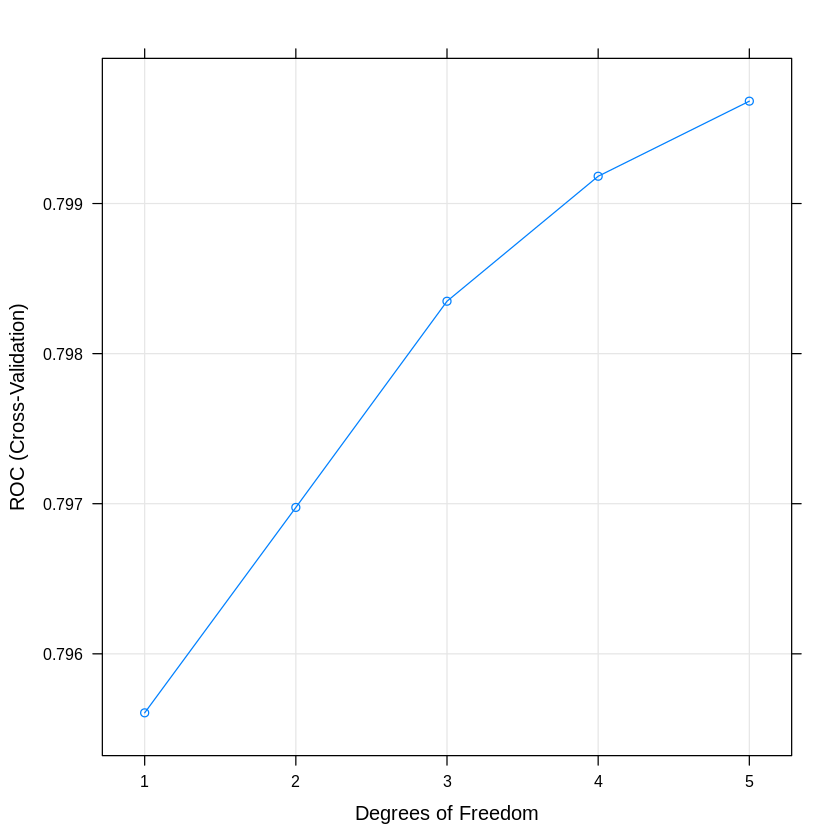

In [ ]:
plot(model_gam )

## Multivariate Adaptive Regression Splines (MARS)


In [ ]:
set.seed(123)
model_mars <- train(
  y ~ ., 
  df_train_mod,
  preProcess = preProc,
  method = "earth",
  glm = list(family = binomial),
  trControl = myControl,
  tuneGrid= expand.grid( .degree= 1:3, .nprune= c(15,20,25))
  )
model_mars

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. ROC will be used instead.”


+ Fold1: degree=1, nprune=25 
- Fold1: degree=1, nprune=25 
+ Fold1: degree=2, nprune=25 
- Fold1: degree=2, nprune=25 
+ Fold1: degree=3, nprune=25 
- Fold1: degree=3, nprune=25 
+ Fold2: degree=1, nprune=25 
- Fold2: degree=1, nprune=25 
+ Fold2: degree=2, nprune=25 
- Fold2: degree=2, nprune=25 
+ Fold2: degree=3, nprune=25 
- Fold2: degree=3, nprune=25 
+ Fold3: degree=1, nprune=25 
- Fold3: degree=1, nprune=25 
+ Fold3: degree=2, nprune=25 
- Fold3: degree=2, nprune=25 
+ Fold3: degree=3, nprune=25 
- Fold3: degree=3, nprune=25 
+ Fold4: degree=1, nprune=25 
- Fold4: degree=1, nprune=25 
+ Fold4: degree=2, nprune=25 
- Fold4: degree=2, nprune=25 
+ Fold4: degree=3, nprune=25 
- Fold4: degree=3, nprune=25 
+ Fold5: degree=1, nprune=25 
- Fold5: degree=1, nprune=25 
+ Fold5: degree=2, nprune=25 
- Fold5: degree=2, nprune=25 
+ Fold5: degree=3, nprune=25 
- Fold5: degree=3, nprune=25 
Aggregating results
Selecting tuning parameters
Fitting nprune = 25, degree = 3 on full training set

Multivariate Adaptive Regression Spline 

58478 samples
   19 predictor
    2 classes: 'si', 'no' 

Pre-processing: nearest neighbor imputation (49), centered (49), scaled (49) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 46782, 46783, 46782, 46783, 46782 
Resampling results across tuning parameters:

  degree  nprune  ROC        Sens       Spec     
  1       15      0.7979727  0.6240977  0.8621363
  1       20      0.8009733  0.6345290  0.8533125
  1       25      0.8009733  0.6345290  0.8533125
  2       15      0.7977106  0.6382921  0.8536549
  2       20      0.8010421  0.6440719  0.8499616
  2       25      0.8038987  0.6433534  0.8498931
  3       15      0.7990423  0.6323741  0.8569040
  3       20      0.8027951  0.6448577  0.8487301
  3       25      0.8061084  0.6472518  0.8484567

ROC was used to select the optimal model using the largest value.
The final values used for the model were nprune = 25 and degree = 3.

In [ ]:
predictions <- predict(model_mars, newdata= df_train_mod)
confusionMatrix(predictions, df_train_mod$y)

Confusion Matrix and Statistics

          Reference
Prediction    si    no
        si 19194  4538
        no 10045 24701
                                          
               Accuracy : 0.7506          
                 95% CI : (0.7471, 0.7541)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5012          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.6565          
            Specificity : 0.8448          
         Pos Pred Value : 0.8088          
         Neg Pred Value : 0.7109          
             Prevalence : 0.5000          
         Detection Rate : 0.3282          
   Detection Prevalence : 0.4058          
      Balanced Accuracy : 0.7506          
                                          
       'Positive' Class : si              
                  

In [ ]:
predictions <- predict(model_mars, newdata= df_test)
confusionMatrix(predictions, df_test$y)

Confusion Matrix and Statistics

          Reference
Prediction   si   no
        si  612 1196
        no  316 6113
                                          
               Accuracy : 0.8164          
                 95% CI : (0.8079, 0.8247)
    No Information Rate : 0.8873          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3507          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.6595          
            Specificity : 0.8364          
         Pos Pred Value : 0.3385          
         Neg Pred Value : 0.9508          
             Prevalence : 0.1127          
         Detection Rate : 0.0743          
   Detection Prevalence : 0.2195          
      Balanced Accuracy : 0.7479          
                                          
       'Positive' Class : si              
                        

In [ ]:
varImp(model_mars)


earth variable importance

  only 20 most important variables shown (out of 49)

                    Overall
euribor3m            100.00
monthMay              56.97
nr_employed           45.46
pdays_binariaSi       37.71
cons_price_idx        36.76
contacttelephone      27.66
defaultunknown        23.70
previous              19.90
age                   19.90
campaign              16.81
day_of_weekMie        15.33
day_of_weekJue         0.00
jobservices            0.00
monthSep               0.00
education4A_Bas        0.00
monthAbr               0.00
jobother               0.00
poutcomenonexistent    0.00
loanyes                0.00
educationTecnico       0.00

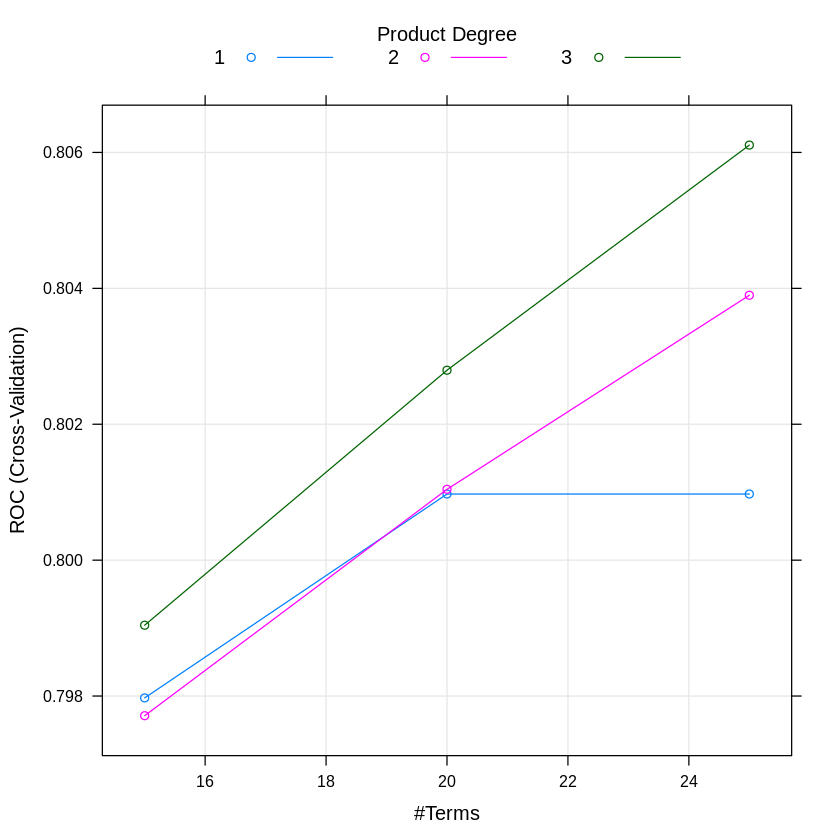

In [ ]:
plot(model_mars)
